# Farm size distribution with Lucas-type farm managers

In the farm-size distribution models explored in other notebooks we assumed a distribution of household farming skill $s_i$ and, implicitly, that time required for management is different and non-substitutable with labor used in farm work (so household has an endowment of 'skill' and separately an endowment of labor).  

With no fixed costs in production this implies every farm household will be a producer.

The original Lucas (1978) span-of-control model on the other hand made the somewhat different assumption that the household had to choose between being a manager/operator or being a pure laborer. 

It's not that hard to adapt the code for the model to allow for a Lucas-style economy as described below.  When we calculate factor demands each household must also decide whether to be a manager or a laborer at given factor prices (operate if profits/return to managerial ability are larger than wage income from instead being a laborer). We search for equilibrium prices based on those decisions. 

In [1]:
%load_ext watermark
%watermark -u -d -t

last updated: 2019-10-17 16:53:49


In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import lognorm
plt.rcParams["figure.figsize"] = (5, 4)
np.set_printoptions(precision=4)
%matplotlib inline

In [11]:
from geqfarm import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Create an 'economy' object with N skill-level groups.

In [12]:
N = 10  # number of skill levels
E = Economy(N)
E.GAMMA = 0.9
E.ALPHA = 0.5
Xbar = [E.TBAR, E.LBAR]

Let's summarize the parameters as they now stand:

In [13]:
E.print_params()

N = 10, GAMMA = 0.9, ALPHA = 0.5, LAMBDA = 0.1, TBAR = 100, LBAR = 100, H = 0.0, 
s = [1. 1. 1. 1. 1. 1.], 
Lucas = False, analytic = True, 

When `Lucas = False` farms don't have to specialize in farm management.  

When we change the flag to `True` then as in Lucas (1978) household labor must be dedicated to either management (and labor must be hired) or to purely laboring.  Only households with managerial skill above a certain theshold will choose to become managers.

## Assumed skill distribution

To illustrate with the simples case, let's assume skills are uniformly distributed across the N groups.  

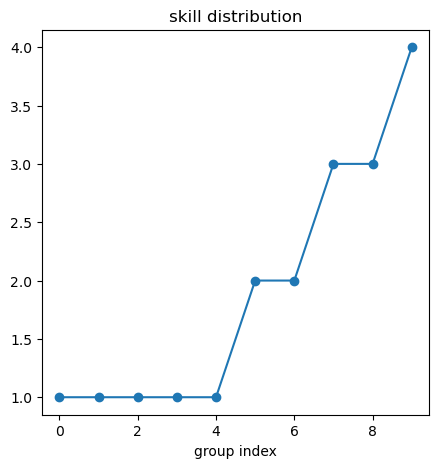

In [14]:
x = np.arange(10)
E.s = np.array([1, 1, 1, 1, 1, 2, 2, 3, 3, 4])

plt.figure(figsize=(5,5))
plt.title('skill distribution')
plt.xlabel('group index')
plt.plot(x,E.s,marker='o');

## No Lucas-style specialization

In the original Lucas (1978) story households have to choose between becoming workers and managers.  If a manager you spend all your time supervising and use hired labor.  If you choose to be a worker you don't manage a firm.  

Here we allow households to be farm operators using own and or hired labor.  So the choice is not so startk. 

We can run the model either way. First we demonstrate the latter.

In [15]:
E.Lucas = False
rwc, (Tc,Lc) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)

Equilibrium factor prices

In [16]:
rwc

array([0.3811, 0.3811])

In [17]:
E.demands(rwc, E.s)

array([[5.2632, 5.2632, 5.2632, 5.2632, 5.2632, 0.    , 0.    , 0.    ,
        0.    , 0.    ],
       [5.2632, 5.2632, 5.2632, 5.2632, 5.2632, 0.    , 0.    , 0.    ,
        0.    , 0.    ]])

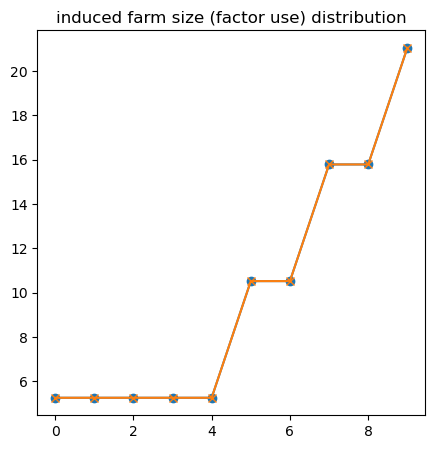

In [20]:
plt.figure(figsize =(5,5))
plt.title('induced farm size (factor use) distribution')
plt.plot(Tc,marker='o')
plt.plot(Lc, marker='x');

Let's verify that at these factor prices excess demands zero out

In [21]:
E.Lucas

False

 ??? PUZZLED BY WHY NEGATIVE PROFITS

In [22]:
E.demands(rwc, E.s)[0]

array([5.2632, 5.2632, 5.2632, 5.2632, 5.2632, 0.    , 0.    , 0.    ,
       0.    , 0.    ])

In [24]:
E.excessD(rwc, Xbar, E.s)   # should be essentially 0

array([-73.6842, -73.6842])

In [35]:
E.s

array([1.    , 1.1111, 1.2222, 1.3333, 1.4444, 1.5556, 1.6667, 1.7778,
       1.8889, 2.    ])

# A Lucas Economy

In [20]:
E.Lucas = True
rwc_L, (Tc_L,Lc_L) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)

In the Lucas equilibrium there is less unskilled labor (since managers cannot be laborers) so all else equal we would expect higher wages.

In [19]:
rwc, rwc_L

(array([0.3192, 0.4787]), array([0.3192, 0.4787]))

In this sample equilibrium the two lowest skill groups become pure laborers. 

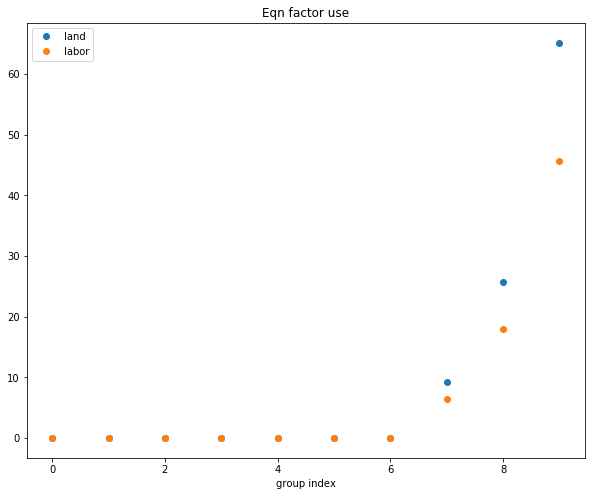

In [46]:
plt.title('Eqn factor use')
plt.xlabel('group index')
plt.plot(x,Tc_L, marker='o', linestyle='None',label='land')
plt.plot(x,Lc_L, marker='o', linestyle='None', label='labor')
plt.legend();

Note that now about 50% of labor is going into management. However this is an artifact of the unform distribution of skill which puts so much population in the higher skill groups.

In [47]:
Tc

array([  6.4158e-06,   2.5367e-04,   3.7095e-03,   3.0692e-02,
         1.7548e-01,   7.7412e-01,   2.8182e+00,   8.8480e+00,
         2.4698e+01,   6.2655e+01])

Note that the two economies (one Lucas style the other non-Lucas) **are not comparable** because they have fundamentally different production technologies.

In [48]:
E.prodn([Tc_L,Lc_L],E.s)

array([   0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,   24.9814,   69.7331,  176.899 ])

In [49]:
E.prodn([Tc,Lc],E.s)

array([  2.1209e-05,   8.3854e-04,   1.2263e-02,   1.0146e-01,
         5.8009e-01,   2.5590e+00,   9.3161e+00,   2.9249e+01,
         8.1645e+01,   2.0712e+02])

In [50]:
sum(E.prodn([Tc_L,Lc_L],E.s))

271.61353371774919

A more land abundant economy

In [51]:
E.TBAR = 500

In [52]:
rwc_L2, (Tc_L2,Lc_L2) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)

In [53]:
rwc_L, rwc_L2

(array([ 0.9778,  2.0953]), array([ 0.3491,  3.74  ]))

In [54]:
Tc_L2,Lc_L2

(array([   0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,   45.9871,  128.3681,  325.6445]),
 array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   6.4381,  17.9712,  45.5893]))

In [55]:
Lc_L

array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   6.4382,  17.9717,  45.5906])

In [56]:
sum(E.prodn([Tc_L2,Lc_L2],E.s))

484.8078705349846

Just out of interest, how much lower would output be in the Non-Lucas economy if every household were self-sufficient.

In [57]:
Tce = np.ones(N)*(E.TBAR/N)
Lce = np.ones(N)*(E.LBAR/N)
sum(E.prodn([Tce,Lce],E.s))

425.35393638200952

In [58]:
E.prodn([Tce,Lce],E.s)

array([ 14.1785,  20.48  ,  26.7815,  33.0831,  39.3846,  45.6862,
        51.9877,  58.2892,  64.5908,  70.8923])

Total earnings...(=value of owned factors + profits)

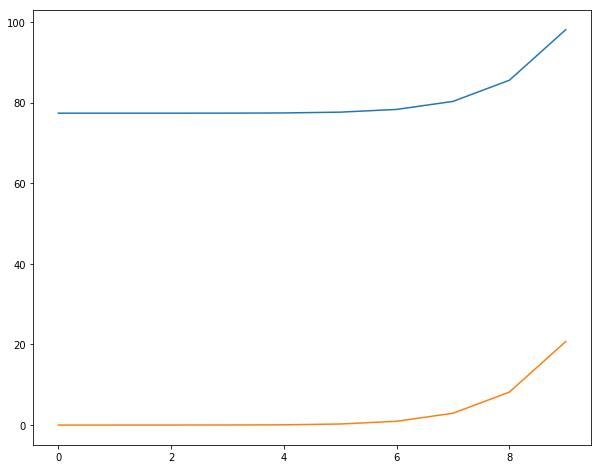

In [59]:
plt.plot(sum(rwc*[E.TBAR/N, E.LBAR/N])+E.prodn([Tc,Lc],E.s) -rwc[0]*Tc -rwc[1]*Lc)
plt.plot(E.prodn([Tc,Lc],E.s) -rwc[0]*Tc -rwc[1]*Lc);

## Market Power distortions

In [60]:
(Xrc,Xr,wc,wr) = scene_print(E,10, detail=True)


Assumed Parameters
N = 10, GAMMA = 0.9, ALPHA = 0.4, LAMBDA = 0.1, TBAR = 500, LBAR = 100, H = 0.0, 
s (tail)= [ 2.7778  3.2222  3.6667  4.1111  4.5556  5.    ], 
Lucas = True, analytic = False, 

Effcient:[ Trc, Lrc]      [rc, wc]      w/r    F( )    [r*Tr]  [w*Lr] 
        [325.64, 45.59]  [0.35,3.74]   10.71  | 315.75   113.67   170.51 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [230.92, 43.54] [ 0.37, 3.29]  8.94 | 272.14    85.14     0.00   143.41  
 0.10  [245.18, 44.05] [ 0.38, 3.24]  8.54 | 279.83    93.14    18.99   142.88  
 0.20  [261.24, 44.71] [ 0.39, 3.19]  8.10 | 288.63   102.80    39.35   142.46  
 0.30  [281.43, 45.95] [ 0.41, 3.12]  7.58 | 300.88   115.75    61.70   143.32  
 0.40  [304.99, 47.72] [ 0.43, 3.04]  6.99 | 316.09   132.55    86.92   145.04  
 0.50  [333.69, 50.33] [ 0.47, 2.94]  6.28 | 336.00   156.20   117.03   147.88  
 0.60  [366.58, 53.70] [ 0.52, 2.80]  5.40 | 359.95   190.22   155.68   150.54  
 0.70  [40

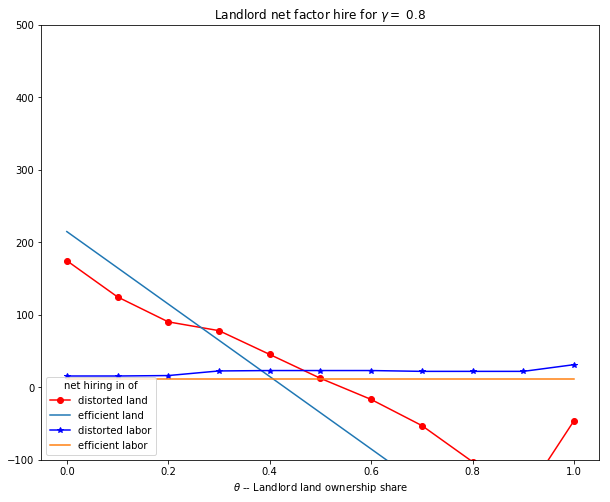

In [28]:
factor_plot(E,Xrc,Xr)

## Lucas = True

In [29]:
E.Lucas = True
rwcl, (Tcl,Lcl) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)

In [30]:
Lcl

array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   2.3885,
         4.5573,   8.0751,  13.4915,  21.4883])

In [31]:
E.excessD(rwcl,Xbar,E.s)

array([  4.0000e+02,   6.9163e-04])

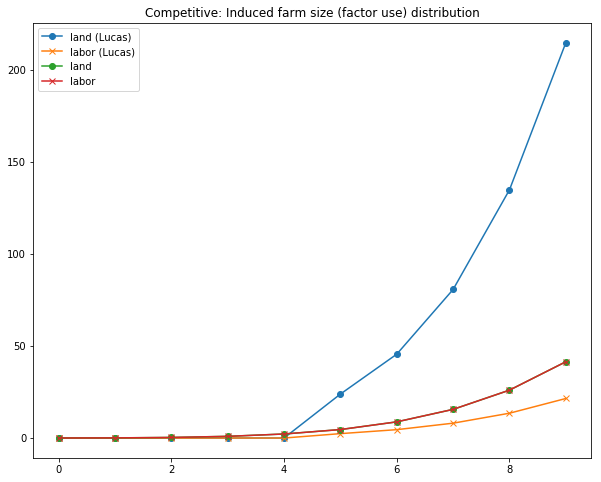

In [32]:
plt.title('Competitive: Induced farm size (factor use) distribution')
plt.plot(Tcl,marker='o',label='land (Lucas)')
plt.plot(Lcl, marker='x',label='labor (Lucas)')
plt.plot(Tc, '-o',label='land ')
plt.plot(Lc, marker='x',label='labor ')
plt.legend();

Not that the two economies are directly comparable (technologies are not the same)... but in the Lucas economy there will be less operating farms and a lower supply of farm labor (since the more skilled become full-time managers).  The farms that do operate will therefore use more land and less labor compared to the non-Lucas economy.

In [33]:
E.Lucas = True
E.smallhold_eq([E.TBAR,E.LBAR/2], E.s)

result(w=array([ 0.3452,  3.4356]), X=array([[   0.    ,    0.    ,    0.    ,    0.    ,    0.    ,   23.8851,
          45.5729,   80.7506,  134.9138,  214.8818],
       [   0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    1.6   ,
           3.0528,    5.4093,    9.0375,   14.3944]]))

### Cartel equilibria

In [34]:
(Xrcl,Xrl,wcl,wrl) = scene_print(E, numS=10, detail=True)


Assumed Parameters
N = 10, GAMMA = 0.8, ALPHA = 0.6, LAMBDA = 0.1, TBAR = 500, LBAR = 100, H = 0.0, 
s (tail)= [ 2.7778  3.2222  3.6667  4.1111  4.5556  5.    ], 
Lucas = True, analytic = False, 

Effcient:[ Trc, Lrc]      [rc, wc]      w/r    F( )    [r*Tr]  [w*Lr] 
        [214.88, 21.49]  [0.39,2.62]   6.67  | 175.68   84.33    56.22 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [174.72, 25.62] [ 0.41, 2.21]  5.41 | 168.29    71.42     0.00    56.61  
 0.10  [174.72, 25.62] [ 0.41, 2.21]  5.41 | 168.29    71.42    20.44    56.61  
 0.20  [190.31, 26.24] [ 0.42, 2.16]  5.15 | 176.67    79.80    41.93    56.62  
 0.30  [228.18, 32.60] [ 0.45, 2.03]  4.52 | 206.62   102.41    67.32    66.07  
 0.40  [245.36, 33.14] [ 0.46, 1.96]  4.23 | 215.07   113.91    92.85    65.11  
 0.50  [262.41, 33.14] [ 0.48, 1.90]  3.95 | 222.13   126.30   120.32    62.98  
 0.60  [283.24, 33.16] [  0.5, 1.82]  3.60 | 230.46   142.98   151.43    60.30  
 0.70  [297.

Compared to the original scenario the landlord with marker power in the Lucas-scneario faces a countervailing force:  if she pushes the wage too low then she makes self-managed production more attractive for a would-be medium sized farmer who is not now in production. 

From the solution it would appear that the beyond a certain theta there does not appear to be an available way for the landlord to distort further. .

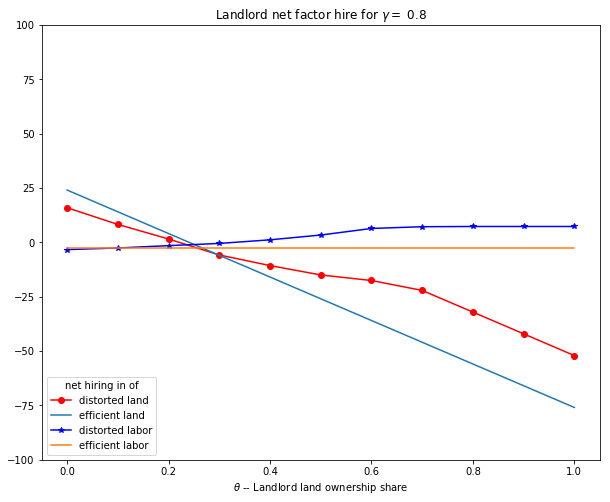

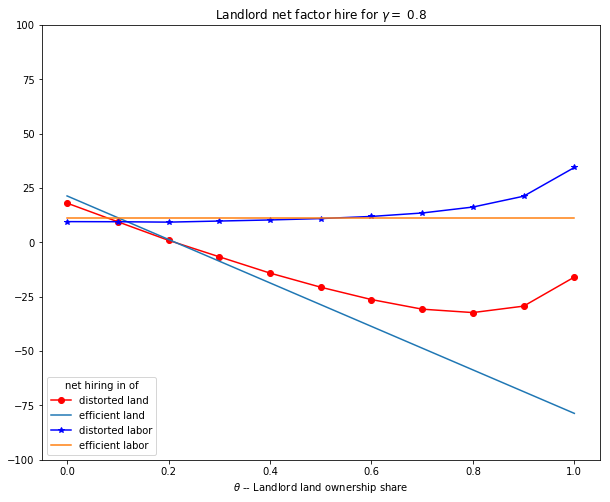

In [21]:
E.Lucas = True
factor_plot(E,Xrcl,Xrl)

E.Lucas = False
factor_plot(E,Xrc,Xr)

In [28]:
E.Lucas = True
E.cartel_eq(0.5)

result(w=array([ 0.2449,  0.5249]), X=array([[  0.    ,   0.    ,   4.2874,   5.4719,   6.9049,   8.6235,
         10.6684,  13.0841,  15.9188,  35.0147],
       [  0.    ,   0.    ,   2.    ,   2.5526,   3.221 ,   4.0227,
          4.9766,   6.1035,   7.4259,  13.3939]]))

In [31]:
E.cartel_eq(0.6)

result(w=array([ 0.2322,  0.5438]), X=array([[  0.    ,   0.    ,   4.6839,   5.978 ,   7.5435,   9.421 ,
         11.6551,  14.2942,  17.3911,  29.0069],
       [  0.    ,   0.    ,   2.    ,   2.5526,   3.221 ,   4.0227,
          4.9766,   6.1035,   7.4259,  11.0562]]))

In [44]:
E.cartel_eq(0.2)
Lr

array([  0.    ,   0.    ,   2.    ,   2.5526,   3.221 ,   4.0227,
         4.9766,   6.1035,   7.4259,  13.3939])

Something is still not right... labor used/demanded excees labor supply

In [46]:
(r,w),(Tr,Lr)= E.cartel_eq(0.5)
sum(Lr),np.count_nonzero(Lr)*(E.LBAR)/E.N

(43.696182284960678, 80.0)

In [47]:
sum(Lr)

43.696182284960678

In [49]:
fringe = E.smallhold_eq([E.TBAR,E.LBAR/2], E.s)

In [57]:
fringe.w

array([ 0.1695,  0.7863])

In [58]:
fringe.X

array([[  0.    ,   0.    ,   0.    ,   0.    ,   9.278 ,  11.5873,
         14.335 ,  17.5809,  21.3899,  25.8321],
       [  0.    ,   0.    ,   0.    ,   0.    ,   2.    ,   2.4978,
          3.0901,   3.7898,   4.6109,   5.5685]])

In [59]:
fringe.X[0]

array([  0.    ,   0.    ,   0.    ,   0.    ,   9.278 ,  11.5873,
        14.335 ,  17.5809,  21.3899,  25.8321])